In [329]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
################################################################################
# Title: Machine Learning Iris.py                                              #
# File: /Users/zacks/Desktop/Code/Python/Projects/Machine Learning Iris.ipynb  #
# Project: /Users/zacks/Desktop/Code/Python/Projects                           #
# Created Date: 2020-03-14                                                     #
# -----                                                                        #
# Author: Zacks Shen                                                           #
# Blog: https://zacks.one                                                      #
# Email: <zacks.shen@gmail.com>                                                #
# Github: https://github.com/ZacksAmber                                        #
# -----                                                                        #
# Last Modified: 2020-03-14 22:25:01 pm                                        #
# Modified By: Zacks Shen <zacks.shen@gmail.com>                               #
# -----                                                                        #
# Copyright (c) 2020 Zacks Shen                                                #
################################################################################

In [330]:
# Clear all variables
%reset -f

In [331]:
# import data and modules
import plotly.express as px
import numpy as np
import pandas as pd

# data source https://archive.ics.uci.edu/ml/datasets/Wine
df = pd.read_csv('https://raw.githubusercontent.com/ZacksAmber/Code/master/Python/DataCamp/Python/Machine%20Learning/Unsupervised%20Learning%20in%20Python/wine.data', sep = ",", header = None) # df is the original dataset, don't modify it!
# rename the columns
df.columns = ['Classification', 
                'Alcohol', 
                'Malic acid', 
                'Ash', 
                'Alcalinity of ash', 
                'Magnesium', 
                'Total phenols', 
                'Flavanoids', 
                'Nonflavanoid phenols', 
                'Proanthocyanins', 
                'Color intensity', 
                'Hue', 
                'OD280/OD315 of diluted wines', 
                'Proline']

df.head()

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [332]:
# Replace the Classification value from number to wine name
df2 = df.copy()
df2['Classification'].replace([1, 2, 3], ['Barolo', 'Grignolino', 'Barbera'], inplace = True)
df2.head()

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [333]:
# k-means clustering without standardization
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3) # Define the number of clusters
labels = model.fit_predict(df2.iloc[:, 1:14]) # skip the Classification

In [334]:
print(labels)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


In [335]:
df3 = pd.DataFrame({'labels': labels, 'varieties': df2['Classification']})

ct = pd.crosstab(df3['labels'], df3['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      46           1
1               29      13          20
2               19       0          50


In [336]:
# descriptive analytics
df2.iloc[:, 1:14].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [337]:
# descriptive analytics
df2.iloc[:, 1:14].var()

Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

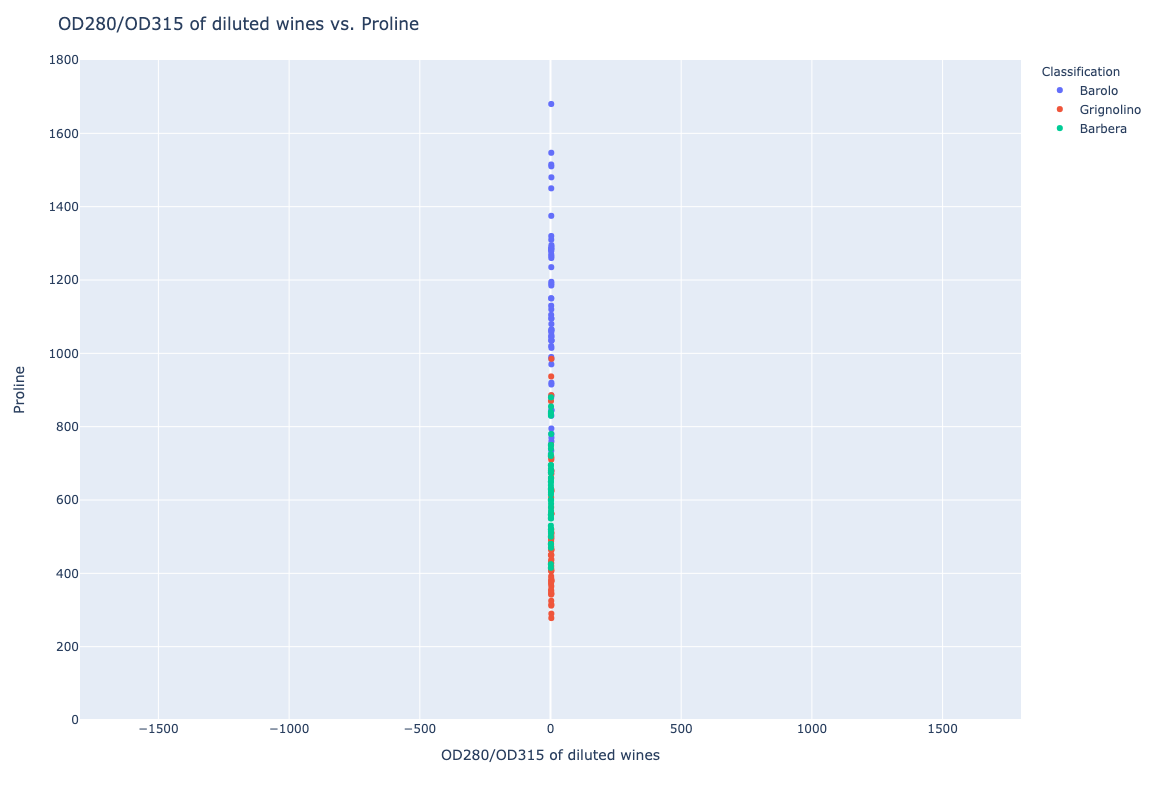

In [338]:
fig = px.scatter(df2, x = 'OD280/OD315 of diluted wines', y = 'Proline', color = 'Classification',
                 height = 800)

fig.update_layout(title = 'OD280/OD315 of diluted wines vs. Proline',
                  xaxis_title = 'OD280/OD315 of diluted wines',
                  yaxis_title = 'Proline',
                  xaxis = dict(
                  range = [-1800, 1800],  # sets the range of xaxis
                  constrain = "domain",  # meanwhile compresses the xaxis by decreasing its "domain"
                    ),
                  yaxis = dict(
                  range = [0, 1800]))
fig.show()

In [339]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
StandardScaler(copy = True, with_mean = True, with_std = True)
df_scaled = scaler.transform(df)

In [340]:
df_scaled = pd.DataFrame(df_scaled)

df_scaled.columns = ['Classification', 
                'Alcohol', 
                'Malic acid', 
                'Ash', 
                'Alcalinity of ash', 
                'Magnesium', 
                'Total phenols', 
                'Flavanoids', 
                'Nonflavanoid phenols', 
                'Proanthocyanins', 
                'Color intensity', 
                'Hue', 
                'OD280/OD315 of diluted wines', 
                'Proline']

In [341]:
df_scaled.var()

Classification                  1.00565
Alcohol                         1.00565
Malic acid                      1.00565
Ash                             1.00565
Alcalinity of ash               1.00565
Magnesium                       1.00565
Total phenols                   1.00565
Flavanoids                      1.00565
Nonflavanoid phenols            1.00565
Proanthocyanins                 1.00565
Color intensity                 1.00565
Hue                             1.00565
OD280/OD315 of diluted wines    1.00565
Proline                         1.00565
dtype: float64

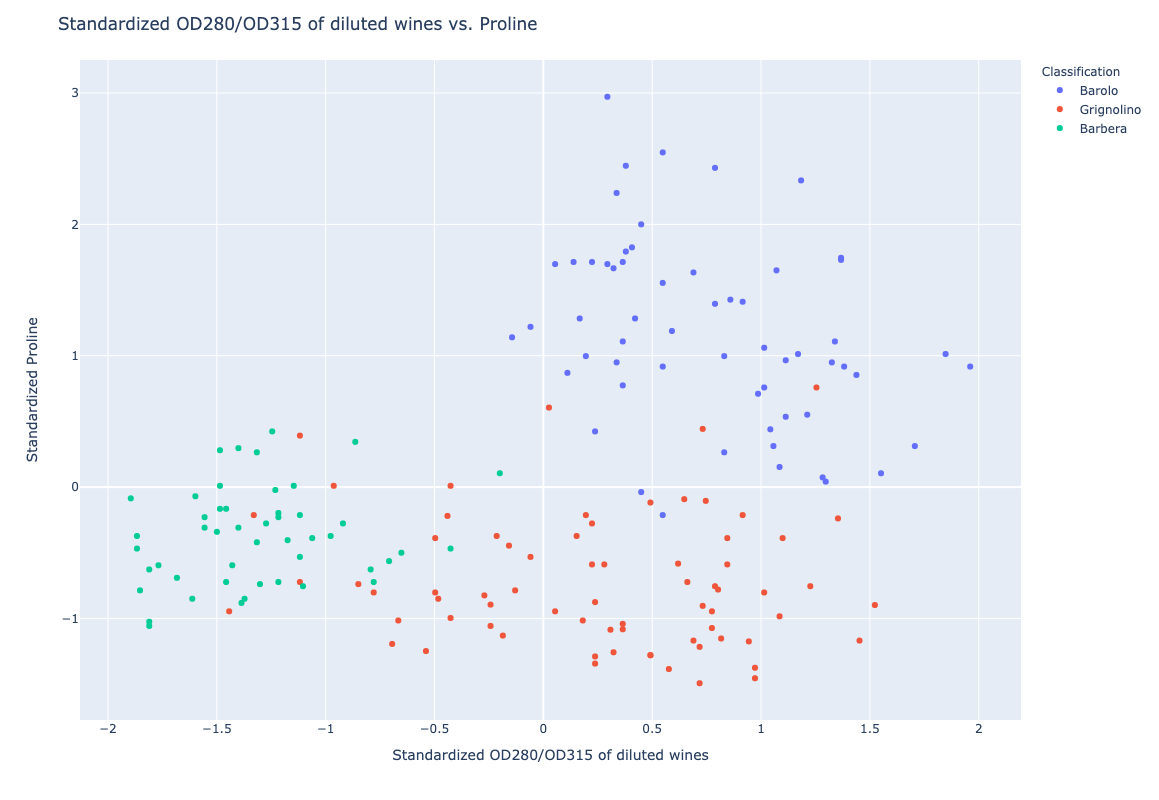

In [342]:
fig = px.scatter(df2, x = df_scaled['OD280/OD315 of diluted wines'], y = df_scaled['Proline'], color = 'Classification',
                 height = 800)

fig.update_layout(title = 'Standardized OD280/OD315 of diluted wines vs. Proline',
                  xaxis_title = 'Standardized OD280/OD315 of diluted wines',
                  yaxis_title = 'Standardized Proline',
                  )

fig.show()

In [343]:
# K-means clustering with standardization
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df.iloc[:, 1:14])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [344]:
scaled_labels = pipeline.predict(df.iloc[:, 1:14])

In [345]:
print(scaled_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [346]:
df_scaled = pd.DataFrame({'labels': scaled_labels, 'varieties': df2['Classification']})

ct = pd.crosstab(df_scaled['labels'], df_scaled['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0      59           3
2                0       0          65


In [347]:
# Another option: Normalization

# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 3 clusters: kmeans
kmeans = KMeans(n_clusters = 3)

df_norm = normalizer.transform(df)

In [348]:
df_norm = pd.DataFrame(df_norm)

df_norm.columns = ['Classification', 
                'Alcohol', 
                'Malic acid', 
                'Ash', 
                'Alcalinity of ash', 
                'Magnesium', 
                'Total phenols', 
                'Flavanoids', 
                'Nonflavanoid phenols', 
                'Proanthocyanins', 
                'Color intensity', 
                'Hue', 
                'OD280/OD315 of diluted wines', 
                'Proline']

In [349]:
df_norm.head()

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752


In [350]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(df.iloc[:, 1:14])

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [351]:
norm_labels = pipeline.predict(df.iloc[:, 1:14])

In [352]:
print(norm_labels)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 1 1 0 0 0 0 1 2 1 0 0
 2 1 1 1 0 1 1 2 0 0 0 1 0 0 2 2 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 1 1 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [353]:
df_norm = pd.DataFrame({'labels': norm_labels, 'varieties': df2['Classification']})

ct = pd.crosstab(df_norm['labels'], df_norm['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               40       8          33
1                4       0          33
2                4      51           5
